# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### 3 Observable Trends from Data
1) The 3 scatter plots generated for Temperature vs. Latitude support a strong correlation. Perhaps most convincing is the n-shaped curve when all the data is aggregated together, showing that no matter which hemisphere a city is in, the closer it is to the equator, the warmer the temperature will be. Note that the coefficient of correlation for cities in the Southern Hemisphere is weaker than the correlation for cities in the Northern Hemisphere (-.67 vs. -.86). This indicates that there are other confounding factors that impact temperature aside from a cities latitude.

2) There is no correlation between wind speed and latitude no matter which hemisphere the city is in, indicated by the r values of 0 and -.14. Wind speed of a city is influenced/caused by other factors outside of distance from equator.

3) While there were weak to moderate relationships shown in the regression between humidity and latitude, it appears that if a city is in the Northern Hemisphere, the closer it is to the equator, the less humid that city will be. This is shown in the aggregated graph with the clump of cities that have the least humidity and are all less than 40 degrees of latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



In [3]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [5]:
# Print the city count to confirm sufficient count
len(cities)

611

In [6]:
#get smaller subet of cities for code testing
cities_test = []
for x in range(25):
    cities_test.append(cities[x])
    
print(cities_test)
    

['iqaluit', 'kapaa', 'san patricio', 'tumannyy', 'torbay', 'qaanaaq', 'punta arenas', 'albany', 'narsaq', 'barrow', 'thompson', 'rikitea', 'charters towers', 'touros', 'busselton', 'huangpi', 'kuruman', 'nikolskoye', 'sao joao da barra', 'farmington', 'bluff', 'ilulissat', 'samarai', 'ribeira grande', 'buta']


# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#generate base URL
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

In [8]:
#create empty lists for the plot variables
successful_cities = []
country = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []


In [9]:
# loop through each city in cities and get the json response (include print log as cities are being processed)
for index, city in enumerate(cities):
    
    try:
        query_url = f"{base_url}{city}"
        response = requests.get(query_url)
        json = response.json()


    #as you loop through, append data to the lists for plot variables
        latitude.append(json["coord"]["lat"])
        longitude.append(json["coord"]["lon"])
        temperature.append(json["main"]["temp"])
        humidity.append(json["main"]["humidity"])
        cloudiness.append(json["clouds"]["all"])
        wind_speed.append(json["wind"]["speed"])
        country.append(json["sys"]["country"])
        
        #increase the index by 1 so that we do not print a 0'th indexed number
        index += 1
        
        #print log as cities are being processed
        print(f"{index}) {city} processed successfully")
        
        #add city to list of successful cities
        successful_cities.append(city)
        
    
    #print cities that are not in the API database
    except:
        index += 1
        print(f"{index}) {city} not found")
    


1) iqaluit processed successfully
2) kapaa processed successfully
3) san patricio processed successfully
4) tumannyy not found
5) torbay processed successfully
6) qaanaaq processed successfully
7) punta arenas processed successfully
8) albany processed successfully
9) narsaq processed successfully
10) barrow processed successfully
11) thompson processed successfully
12) rikitea processed successfully
13) charters towers processed successfully
14) touros processed successfully
15) busselton processed successfully
16) huangpi processed successfully
17) kuruman processed successfully
18) nikolskoye processed successfully
19) sao joao da barra processed successfully
20) farmington processed successfully
21) bluff processed successfully
22) ilulissat processed successfully
23) samarai processed successfully
24) ribeira grande processed successfully
25) buta processed successfully
26) hobart processed successfully
27) te anau processed successfully
28) hermanus processed successfully
29) geo

235) pangnirtung processed successfully
236) mitsamiouli processed successfully
237) barinas processed successfully
238) kahului processed successfully
239) gimli processed successfully
240) carnarvon processed successfully
241) yulara processed successfully
242) mocambique not found
243) balakhninskiy processed successfully
244) longyearbyen processed successfully
245) sao filipe processed successfully
246) salalah processed successfully
247) abdanan processed successfully
248) santa rita processed successfully
249) saint-georges processed successfully
250) wilmington processed successfully
251) najran processed successfully
252) lavrentiya processed successfully
253) booue processed successfully
254) skalistyy not found
255) sofiysk not found
256) jijiga processed successfully
257) santa catarina de tepehuanes processed successfully
258) shymkent processed successfully
259) sibolga processed successfully
260) broken hill processed successfully
261) santa maria del oro processed succe

461) assiniboia processed successfully
462) murray bridge processed successfully
463) swellendam processed successfully
464) zhezkazgan processed successfully
465) codrington processed successfully
466) miles city processed successfully
467) kuito processed successfully
468) nguiu not found
469) nador processed successfully
470) nevesinje processed successfully
471) luanda processed successfully
472) maldonado processed successfully
473) zvishavane processed successfully
474) buin processed successfully
475) pacific grove processed successfully
476) yar-sale processed successfully
477) tubruq not found
478) whitehorse processed successfully
479) port macquarie processed successfully
480) burnie processed successfully
481) chapais processed successfully
482) ponta delgada processed successfully
483) gelibolu processed successfully
484) flinders processed successfully
485) maraba processed successfully
486) cabo rojo processed successfully
487) tessalit processed successfully
488) ahipar

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#create dataframe out of weather data collected
weather_df = pd.DataFrame({"City": successful_cities, "Country": country, "Longitude":longitude, "Latitude": latitude, "Temperature (F)": temperature,
                           "Humidity (%)": humidity, "Cloudiness (%)": cloudiness, "Wind Speed (mph)": wind_speed})

weather_df.head()

,City,Country,Longitude,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,iqaluit,CA,-68.5145,63.7506,-13.00,70,1,28.77
1,kapaa,US,-159.3190,22.0752,72.05,73,20,18.41
2,san patricio,US,-97.5169,28.0170,50.74,93,1,3.44
3,torbay,CA,-52.7314,47.6666,25.90,80,90,4.61
4,qaanaaq,GL,-69.3632,77.4840,-13.86,59,0,5.53


In [11]:
#export the data into a csv
csv_path = "../output_data/weather.csv"
weather_csv = weather_df.to_csv(csv_path, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = weather_df.loc[weather_df["Humidity (%)"] > 100].index.tolist()
humid_cities


[]

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_weather_df = weather_df.drop(humid_cities).reset_index()

#delete extraneous index column
del clean_weather_df["index"]

#display clean df
clean_weather_df


,City,Country,Longitude,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,iqaluit,CA,-68.5145,63.7506,-13.00,70,1,28.77
1,kapaa,US,-159.3190,22.0752,72.05,73,20,18.41
2,san patricio,US,-97.5169,28.0170,50.74,93,1,3.44
3,torbay,CA,-52.7314,47.6666,25.90,80,90,4.61
4,qaanaaq,GL,-69.3632,77.4840,-13.86,59,0,5.53
...,...,...,...,...,...,...,...,...
549,alta floresta,BR,-56.0861,-9.8756,78.80,89,75,3.44
550,colares,PT,-9.4469,38.7992,56.08,94,75,12.66
551,chapleau,CA,-83.4034,47.8405,1.40,85,90,4.61
552,hirara,JP,125.2833,24.8000,59.25,70,100,20.07


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature vs. Latitude Plot

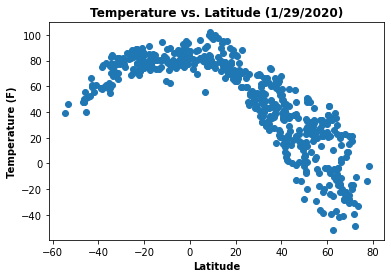

In [29]:
plt.scatter(clean_weather_df["Latitude"], clean_weather_df["Temperature (F)"])
plt.title("Temperature vs. Latitude (1/29/2020)", fontweight="bold")
plt.xlabel("Latitude", fontweight = "bold")
plt.ylabel("Temperature (F)", fontweight = "bold")

plt.savefig(f"../output_data/temp_lat.png")
plt.show()

The plot above is analyzing the relationship between a city's latitude and temperature on 1/29/2020, with latitude as the independent x variable and temperature in degrees farenheit as the dependent y variable.

## Humidity vs. Latitude Plot

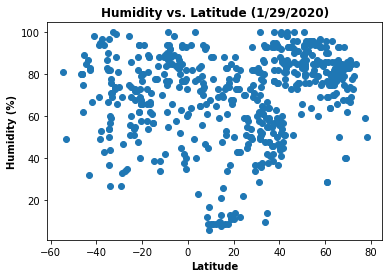

In [30]:
plt.scatter(clean_weather_df["Latitude"], clean_weather_df["Humidity (%)"])
plt.title("Humidity vs. Latitude (1/29/2020)", fontweight="bold")
plt.xlabel("Latitude", fontweight = "bold")
plt.ylabel("Humidity (%)", fontweight = "bold")

plt.savefig(f"../output_data/humid_lat.png")

plt.show()

The plot above is analyzing the relationship between a city's latitude and humidity % on 1/29/2020, with latitude as the independent x variable and humidity % farenheit as the dependent y variable.

## Cloudiness vs. Latitude Plot

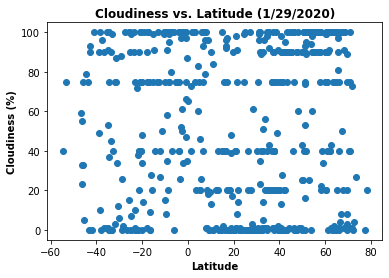

In [31]:
plt.scatter(clean_weather_df["Latitude"], clean_weather_df["Cloudiness (%)"])
plt.title("Cloudiness vs. Latitude (1/29/2020)", fontweight="bold")
plt.xlabel("Latitude", fontweight = "bold")
plt.ylabel("Cloudiness (%)", fontweight = "bold")

plt.savefig(f"../output_data/cloud_lat.png")
plt.show()

The plot above is analyzing the relationship between a city's latitude and cloudiness % on 1/29/2020, with latitude as the independent x variable and cloudiness % as the dependent y variable.

## Wind Speed vs. Latitude Plot

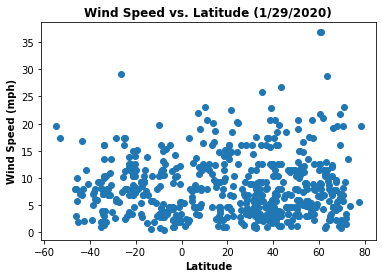

In [32]:
plt.scatter(clean_weather_df["Latitude"], clean_weather_df["Wind Speed (mph)"])
plt.title("Wind Speed vs. Latitude (1/29/2020)", fontweight="bold")
plt.xlabel("Latitude", fontweight = "bold")
plt.ylabel("Wind Speed (mph)", fontweight = "bold")

plt.savefig(f"../output_data/wind_lat.png")
plt.show()

The plot above is analyzing the relationship between a city's latitude and wind speed (mph) on 1/29/2020, with latitude as the independent x variable and wind speed (mph) as the dependent y variable.

## Linear Regression

In [18]:
#insert new column in the df for hemisphere and insert northern or southern based on the latitude value
clean_weather_df["Hemisphere"] = np.where(clean_weather_df["Latitude"] >= 0, "Northern", "Southern")
clean_weather_df

,City,Country,Longitude,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Hemisphere
0,iqaluit,CA,-68.5145,63.7506,-13.00,70,1,28.77,Northern
1,kapaa,US,-159.3190,22.0752,72.05,73,20,18.41,Northern
2,san patricio,US,-97.5169,28.0170,50.74,93,1,3.44,Northern
3,torbay,CA,-52.7314,47.6666,25.90,80,90,4.61,Northern
4,qaanaaq,GL,-69.3632,77.4840,-13.86,59,0,5.53,Northern
...,...,...,...,...,...,...,...,...,...
549,alta floresta,BR,-56.0861,-9.8756,78.80,89,75,3.44,Southern
550,colares,PT,-9.4469,38.7992,56.08,94,75,12.66,Northern
551,chapleau,CA,-83.4034,47.8405,1.40,85,90,4.61,Northern
552,hirara,JP,125.2833,24.8000,59.25,70,100,20.07,Northern


In [19]:
northern_df = clean_weather_df.loc[clean_weather_df["Hemisphere"] == "Northern"]
southern_df = clean_weather_df.loc[clean_weather_df["Hemisphere"] == "Southern"]

In [20]:
#get a list of columns in the dataframe so that we can loop through the columns and create plots
columns = clean_weather_df.columns.tolist()
columns.remove("City")
columns.remove("Country")
columns.remove("Longitude")
columns.remove("Latitude")
columns.remove("Hemisphere")

columns

['Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']

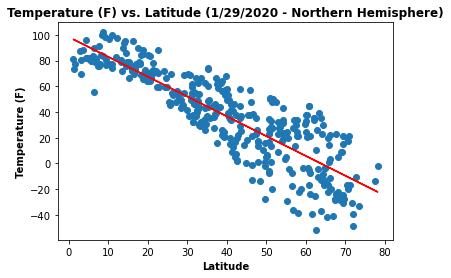

The line equation for the Northern Hemisphere Temperature (F) vs. Latitude relationship is y = -1.54x + 98.31
The r value for the Northern Hemisphere Temperature (F) vs. Latitude relationship is r=-0.86
-----------------------------------------------------------------------------------------------


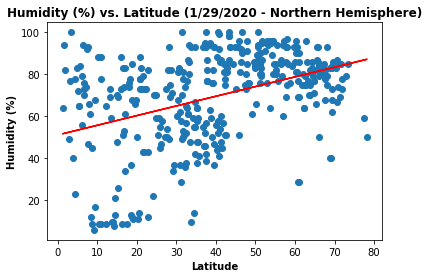

The line equation for the Northern Hemisphere Humidity (%) vs. Latitude relationship is y = 0.46x + 51.17
The r value for the Northern Hemisphere Humidity (%) vs. Latitude relationship is r=0.4
-----------------------------------------------------------------------------------------------


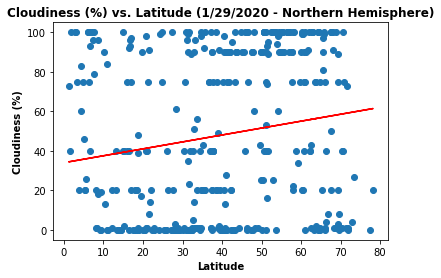

The line equation for the Northern Hemisphere Cloudiness (%) vs. Latitude relationship is y = 0.35x + 34.02
The r value for the Northern Hemisphere Cloudiness (%) vs. Latitude relationship is r=0.17
-----------------------------------------------------------------------------------------------


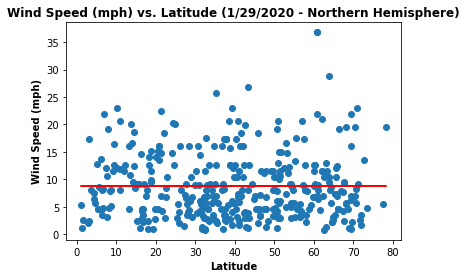

The line equation for the Northern Hemisphere Wind Speed (mph) vs. Latitude relationship is y = 0.0x + 8.72
The r value for the Northern Hemisphere Wind Speed (mph) vs. Latitude relationship is r=0.0
-----------------------------------------------------------------------------------------------


In [27]:
#loop through the columns and retrieve regression values for Northern Hempisphere graphs
for column in columns:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Latitude"], northern_df[f"{column}"])
    slope = round(slope, 2)
    intercept = round(intercept, 2)
    rvalue = round(rvalue, 2)
    regress_values = (slope * northern_df["Latitude"]) + intercept
    line_eq = f"y = {slope}x + {intercept}"
    
    #plot Northern Hempisphere Temp vs Latitude as well as the regression line and equation
    plt.scatter(northern_df["Latitude"], northern_df[f"{column}"])
    plt.title(f"{column} vs. Latitude (1/29/2020 - Northern Hemisphere)", fontweight = "bold")
    plt.xlabel("Latitude", fontweight = "bold")
    plt.ylabel(f"{column}", fontweight = "bold")
    plt.plot(northern_df["Latitude"], regress_values, "r-")
    
    #save plots as png's in output_data folder
    plt.savefig(f"../output_data/northern_{column}.png")
    
    #display plots below
    plt.show()
    
    #print line equation and r value under the plot
    print(f"The line equation for the Northern Hemisphere {column} vs. Latitude relationship is {line_eq}")
    print(f"The r value for the Northern Hemisphere {column} vs. Latitude relationship is r={rvalue}")
    print("-----------------------------------------------------------------------------------------------")



##### Comments on the northern hempisphere plots/regressions

1) Temperature vs. Latitude
    - The relationship between Temperature and Latitude is very strong, indicated by the -.86 r value in the regression. As expected, the regression line has negative slope, because we would expect temperature to decrease as distance from the equator in the northern direction increases.
    
2) Humidity vs. Latitude
    - The relationship between Humidity and Latitude is moderate, as indicated by the r value of .4. The regression line slope is positive, indicating there is a slight direct relationship between distance from the equator in the northern hemisphere and humidity.
    
3) Cloudiness vs. Latitude
    - The relationship between Cloudiness and Latitude is weak as indicated by the r value of .17. Based on this r value one can conclude that there is no discernible relationship between a city's "cloudiness" and its distance from the equator in the northern hemisphere.
    
4) Wind Speed vs. Latitude
    - There is no linear relationship between wind speed and latitude as indicated by the r value of 0. As shown in the plot, the scatter of the points is an indication that wind speed and latitude are not correlated in any manner.

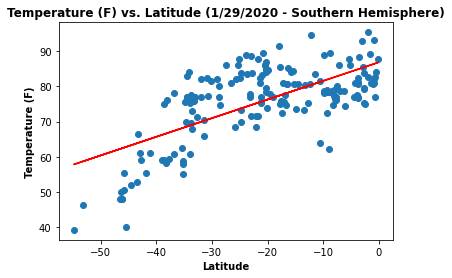

The line equation for the Southern Hemisphere Temperature (F) vs. Latitude relationship is y = 0.53x + 86.87
The r value for the Southern Hemisphere Temperature (F) vs. Latitude relationship is r=0.67
-----------------------------------------------------------------------------------------------


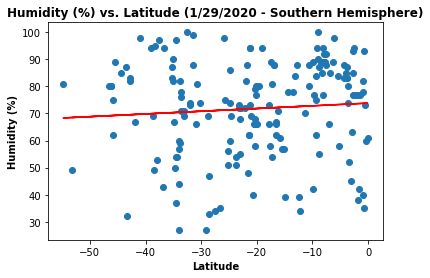

The line equation for the Southern Hemisphere Humidity (%) vs. Latitude relationship is y = 0.1x + 73.83
The r value for the Southern Hemisphere Humidity (%) vs. Latitude relationship is r=0.08
-----------------------------------------------------------------------------------------------


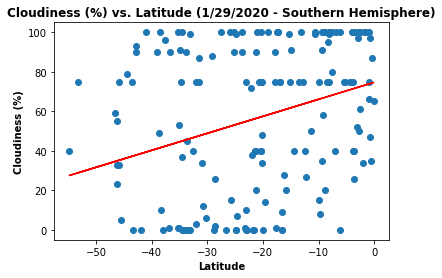

The line equation for the Southern Hemisphere Cloudiness (%) vs. Latitude relationship is y = 0.86x + 74.66
The r value for the Southern Hemisphere Cloudiness (%) vs. Latitude relationship is r=0.31
-----------------------------------------------------------------------------------------------


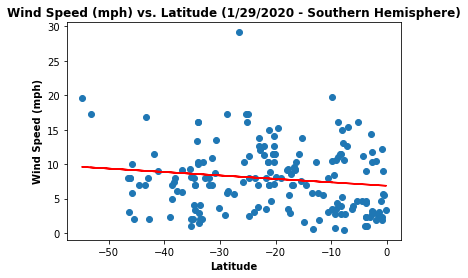

The line equation for the Southern Hemisphere Wind Speed (mph) vs. Latitude relationship is y = -0.05x + 6.86
The r value for the Southern Hemisphere Wind Speed (mph) vs. Latitude relationship is r=-0.14
-----------------------------------------------------------------------------------------------


In [28]:
#loop through the columns and retrieve regression values for Southern Hempisphere graphs
for column in columns:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Latitude"], southern_df[f"{column}"])
    slope = round(slope, 2)
    intercept = round(intercept, 2)
    rvalue = round(rvalue, 2)
    regress_values = (slope * southern_df["Latitude"]) + intercept
    line_eq = f"y = {slope}x + {intercept}"
    
    #plot Southern Hempisphere Temp vs Latitude as well as the regression line and equation
    plt.scatter(southern_df["Latitude"], southern_df[f"{column}"])
    plt.title(f"{column} vs. Latitude (1/29/2020 - Southern Hemisphere)", fontweight = "bold")
    plt.xlabel("Latitude", fontweight = "bold")
    plt.ylabel(f"{column}", fontweight = "bold")
    plt.plot(southern_df["Latitude"], regress_values, "r-")
    
    #save plots as png's in output_data folder
    plt.savefig(f"../output_data/southern_{column}.png")
    
    #display plots below
    plt.show()
    
   
    
       #print line equation and r value under the plot
    print(f"The line equation for the Southern Hemisphere {column} vs. Latitude relationship is {line_eq}")
    print(f"The r value for the Southern Hemisphere {column} vs. Latitude relationship is r={rvalue}")
    print("-----------------------------------------------------------------------------------------------")


#### Comments on the southern hemisphere plots/regressions

1) Temperature vs. Latitude
    - The relationship between Temperature and Latitude is moderate to strong, indicated by the .67 r value in the regression. As expected, the regression line has positive slope, because we would expect temperature to decrease as distance from the equator decreases (i.e. increases in the negative direction). Note that this relationship is the opposite of the northern hempisphere which is to be expected, as the direction to the equator in each hemisphere is opposite (northern hemisphere positive values, southern hemisphere negative values).
    
2) Humidity vs. Latitude
    - The relationship between Humidity and Latitude is weak, as indicated by the r value of .08. The regression line slope is positive, indicating there is a slight direct relationship between distance from the equator in the southern hemisphere and humidity.
    
3) Cloudiness vs. Latitude
    - The relationship between Cloudiness and Latitude is weak to moderate as indicated by the r value of .31. Based on this r value one can conclude that there is a weak or no discernible relationship between a city's "cloudiness" and its distance from the equator in the southern hemisphere.
    
4) Wind Speed vs. Latitude
    - There is a weak linear relationship between wind speed and latitude as indicated by the r value of -.14. Although a weak relationship, the r value could indicate that as a city gets further away from the equator in the southern hemisphere, the windier that city will be.